In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

In [3]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
      
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Using Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [7]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8100558659217877

**Using Random Forest Classifier**

In [8]:
from sklearn.ensemble import RandomForestClassifier
clfs = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [9]:
predictions = clfs.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8044692737430168

In [10]:
submission_preds = clf.predict(test)

In [11]:
dfs = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                  })

<AxesSubplot:>

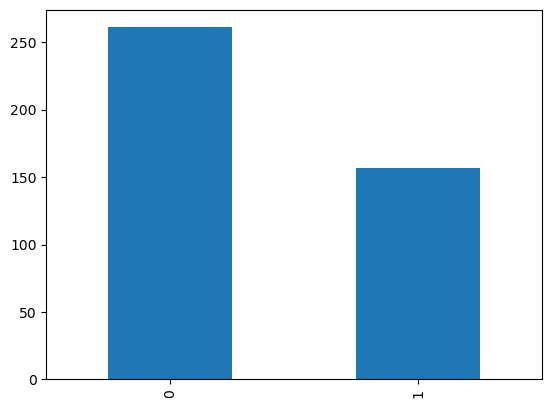

In [12]:
dfs['Survived'].value_counts().plot(kind='bar')

In [13]:
dfs.to_csv("submission.csv", index=False)